# Sklearn
## Licensing
   - Licensed under Creative Commons CC-BY-SA 4.0
   - Some text and images copyright Wikipedia 2012
   - (C) 2020 Abram Hindle


# Machine Learning Classifiers
## Intro
   - AI that learns from data
     - Learn what spam looks likes to filter it out
   - Classify data into types
     - Learning spam
   - Cluster data by similarity
     - Finding messages that are similar to spam
   - Represent Data
     - Come up with representations to learn from
   - Find important and distinct properties of the data.
     - Certain words are spam keywords!

## Kinds of ML
   - Supervised
     - we give it classified examples and hope it can classify more
   - Unsupervised 
     - labels unknown, let the algorithm find them
   - Semi Supervised learning
     - labelled and unlablled.
   - Representation Learning
     - How to represent data
   - Reinforcement Learning
     - policies to reward the learner

## Sklearn
   - ML Toolkit
   - Good for initial exploration if something will work
   - Nice way to debug classic ML learners
   - Easy to automate in python

## Some Kinds of Learners for Classification
   - Tree Based
     - C4.5 (J48)
     - Random Forest
     - Decision Tree
   - Rule Learners
     - Ripper (jRip)
   - Support Vector Machines
     - SVM/LibSVM
   - Bayesian Nets



# Learners
## Learners operate on different classes and values
   - Some learners are boolean (True/False or 0/1)
   - Some learners are nominal (class) (A/B/C/..)
   - Some learners learn counts (1,2,3,..)
   - Some learners learn real functions (Y = b + ax)

# SKleanr has lots of classifiers:
   - https://scikit-learn.org/stable/supervised_learning.html


# SKLearn API
* Construct the learner
* Split the dataset
* Fit the learner
* Predict label or predict probability
* Score the results

# First we'll load some data

In [131]:

import sklearn
import scipy.io 
import numpy as np
import sklearn.model_selection


coffeering, meta = scipy.io.arff.loadarff("./data/coffee-ring/coffee-ring.arff")
print(meta)
print(coffeering)
coffeeringX = np.array([[x[0],x[1]] for x in coffeering])
coffeeringY = np.array([x[2]==b'1' for x in coffeering])
print(coffeeringX)
print(coffeeringX.shape)
print(coffeeringY)
print(coffeeringY.shape)


Dataset: small-slice-weka.filters.unsupervised.attribute.NumericToNominal-Rlast
	X's type is numeric
	Y's type is numeric
	CLASS's type is nominal, range is ('0', '1')

[(0.385, 0.395, b'1') (0.581, 0.361, b'1') (0.602, 0.63 , b'1') ...
 (0.467, 0.121, b'0') (0.225, 0.472, b'0') (0.915, 0.869, b'0')]
[[0.385 0.395]
 [0.581 0.361]
 [0.602 0.63 ]
 ...
 [0.467 0.121]
 [0.225 0.472]
 [0.915 0.869]]
(1999, 2)
[ True  True  True ... False False False]
(1999,)


In [139]:
# Construct
zeror = sklearn.dummy.DummyClassifier(strategy="most_frequent")
# Split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
# Fit
print(zeror.fit(X_train, y_train))
print("Accuracy on train set:",zeror.score(X_train,y_train))
# Predict
prediction = zeror.predict(X_test)
print(prediction[0:10])
# Score
print("Accuracy on test set:",sklearn.metrics.accuracy_score(y_test, prediction))

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')
Accuracy on train set: 0.5025025025025025
[False False False False False False False False False False]
Accuracy on test set: 0.498


## Most Frequent / ZeroR Learner
   - The smartest monkey
   - Always chooses the class with the largest number of entities
   - Good as a base line. 
   - If you measure accuracy you have to beat ZeroR.




In [30]:
import sklearn
import sklearn.dummy


X = coffeeringX
y = coffeeringY
zeror = sklearn.dummy.DummyClassifier(strategy="most_frequent")
zeror.fit(X, y)
prediction = zeror.predict(X)
print(prediction)
print("Accuracy: ",zeror.score(X, y))
print("Are all the predictions false?")
print(np.all(prediction==False))



[False False False ... False False False]
Accuracy:  0.5002501250625313
Are all the predictions false?
True



## C4.5 and Tree Learners
   - Produces a decision tree
   - The model is code and interpretable
   - Sometimes trees are too big.
   - each branch is a conditional
   - each leaf is a class


Accuracy:  1.0
Accuracy:  1.0


[Text(175.16513671875, 210.645, 'X[1] <= 0.675\ngini = 0.5\nsamples = 1999\nvalue = [1000, 999]'),
 Text(169.93388671875002, 197.055, 'X[1] <= 0.335\ngini = 0.476\nsamples = 1641\nvalue = [642, 999]'),
 Text(164.70263671875, 183.465, 'gini = 0.0\nsamples = 329\nvalue = [329, 0]'),
 Text(175.16513671875, 183.465, 'X[0] <= 0.332\ngini = 0.363\nsamples = 1312\nvalue = [313, 999]'),
 Text(169.93388671875002, 169.875, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(180.39638671875, 169.875, 'X[0] <= 0.678\ngini = 0.285\nsamples = 1207\nvalue = [208, 999]'),
 Text(175.16513671875, 156.285, 'X[1] <= 0.618\ngini = 0.169\nsamples = 1102\nvalue = [103, 999]'),
 Text(73.0740234375, 142.695, 'X[0] <= 0.382\ngini = 0.2\nsamples = 823\nvalue = [93, 730]'),
 Text(18.309375, 129.10500000000002, 'X[1] <= 0.373\ngini = 0.058\nsamples = 233\nvalue = [7, 226]'),
 Text(13.078125, 115.515, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(23.540625000000002, 115.515, 'X[1] <= 0.604\ngini = 0.042\nsamp

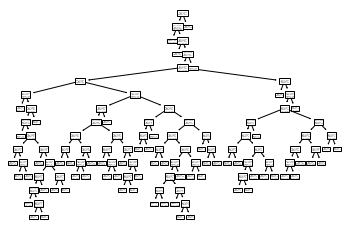

In [47]:
# See Scitkit Learn Documentation https://scikit-learn.org/stable/modules/tree.html
import graphviz
import sklearn.tree
tree = sklearn.tree.DecisionTreeClassifier()

tree = tree.fit(coffeeringX, coffeeringY)
print("Accuracy: ",tree.score(X, y))

tree = tree.fit(coffeeringX, coffeeringY)
print("Accuracy: ",tree.score(X, y))

sklearn.tree.plot_tree(tree)


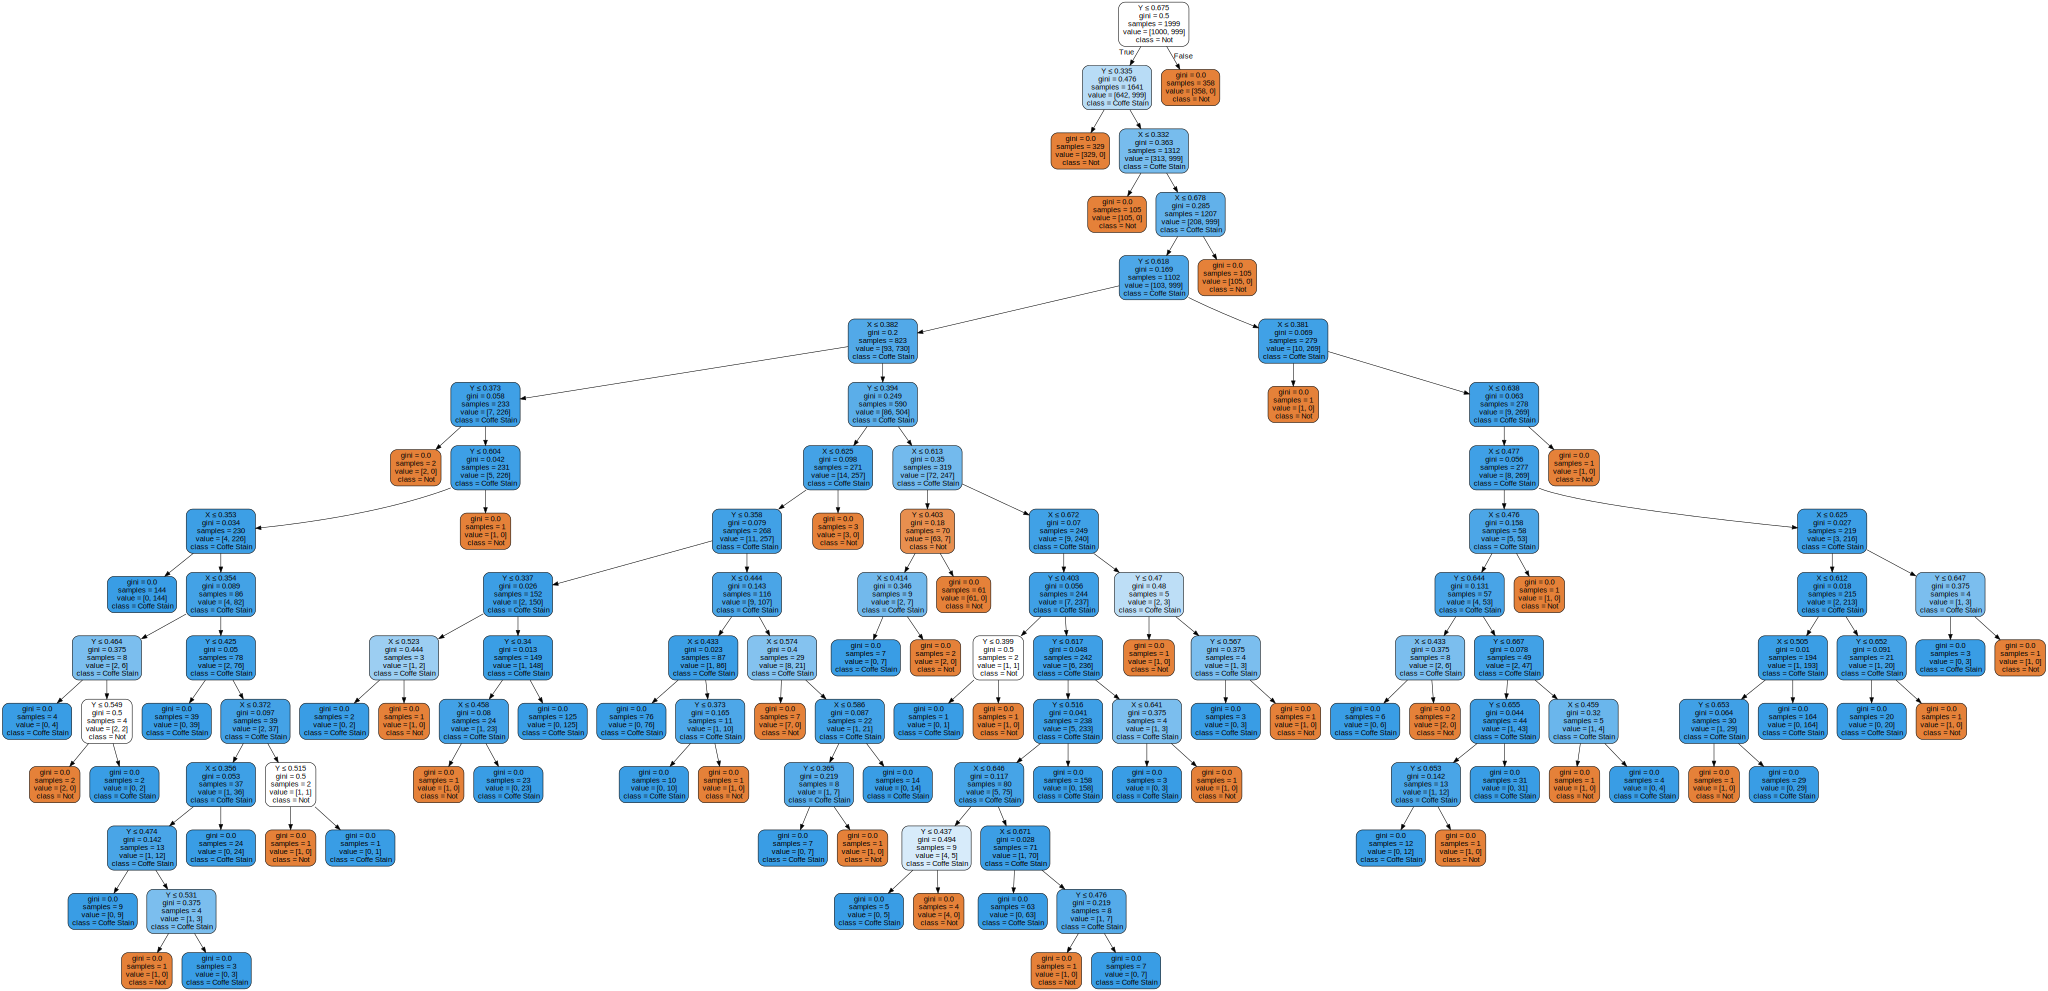

In [48]:
# pretty plot
import graphviz
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, 
                      feature_names=["X","Y"],
                      class_names=["Not","Coffe Stain"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Accuracy:  0.9484742371185593
Accuracy:  0.9484742371185593


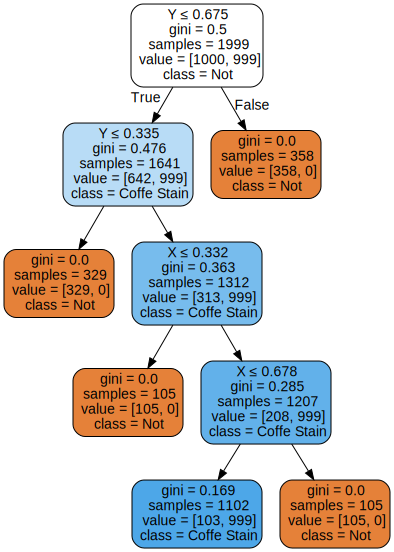

In [49]:
MAXDEPTH = 4

tree = sklearn.tree.DecisionTreeClassifier(max_depth=MAXDEPTH)

tree = tree.fit(coffeeringX, coffeeringY)
print("Accuracy: ",tree.score(X, y))

tree = tree.fit(coffeeringX, coffeeringY)
print("Accuracy: ",tree.score(X, y))

#sklearn.tree.plot_tree(tree)

dot_data = sklearn.tree.export_graphviz(tree, out_file=None, 
                      feature_names=["X","Y"],
                      class_names=["Not","Coffe Stain"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [68]:
# edx, meta = scipy.io.arff.loadarff("./data/triage/data/edx-platform/large.arff")
import csv

def parse_arff_lines(lines):
    reader = csv.reader(lines,delimiter=',',quotechar="'")
    return [row for row in reader]
    
def read_string_arff(fd):
    lines = fd.readlines()
    for i,line in enumerate(lines):
        if line == "@data\n":
            return parse_arff_lines(lines[i+1:])
    return None
edxfile = "./data/triage/data/edx-platform/largewo.arff"
edx = read_string_arff(open(edxfile))
# owners
edxY = np.array([x[1] for x in edx])
# content
edxX = np.array([x[2] for x in edx])
print(edxY[0:10])
print(edxX[0:10])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()
countedx = countvectorizer  
countEdxX = countvectorizer.fit_transform(edxX)
tfidfEdxX = tfidfvectorizer.fit_transform(edxX)
print(edxY.shape)
print(countEdxX.shape)
print(tfidfEdxX.shape)


['sarina' 'nasthagiri' 'clintonb' 'nedbat' 'sarina' 'ormsbee'
 'chrisndodge' 'sarina' 'sarina' 'auraz']
['"Lazy loading of CourseMode model\'s internationalization.\\nThe use of `ugettext` here instead of `ugettext_lazy` can cause cyclical imports if this module is loaded earlier than expected. Per the Django documentation:\\r\\nhttps://docs.djangoproject.com/en/dev/topics/i18n/translation/#lazy-translation\\r\\n\\r\\nAnd yes'
 '"Small changes to the segment.io event handler\\nFix a couple of outstanding issues discovered during end-to-end testing:\\n\\n1) The segment.io client libraries don\'t always set the channel field properly'
 'This confirms the data api upgrade\\n'
 'Generalizing CONTRIBUTING.rst to all repos\\n'
 'Email content history fix and additions\\nThis addresses a bug in the email content history table where\\r\\n"Unknown" was displayed in the number of emails sent column if any sort of\\r\\nfailure occurred during email sending. This behavior has been edited so now\\r



## Naive Bayes
   - Asks the question what is the probability of this value belonging
     to this class?
   - multiplies all of these probabilities together
   - can perform really badly on numerical problems.

In [89]:
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

classifiers = [
    ["GaussainNB",sklearn.naive_bayes.GaussianNB],
    ["MultinomialNB",sklearn.naive_bayes.MultinomialNB],
    ["ComplementNB",sklearn.naive_bayes.ComplementNB],
    ["BernoulliNB",sklearn.naive_bayes.BernoulliNB]
]

for classifier in classifiers:
    name, constructor = classifier
    nb = constructor()
    nb.fit(coffeeringX, coffeeringY)
    print("%s with coffeestain" % name)
    print(nb.score(coffeeringX, coffeeringY))
    nb = constructor()
    nb.fit(countEdxX.toarray(), edxY)
    print("%s with triagers counts" % name)
    print(nb.score(countEdxX.toarray(), edxY))
    nb = constructor()
    nb.fit(tfidfEdxX.toarray(), edxY)
    print("%s with triagers tfidf" % name)
    print(nb.score(tfidfEdxX.toarray(), edxY))

    
    X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
    nb = constructor()
    nb.fit(X_train, y_train)
    print("%%50 test split %s with coffeestain" % name)
    print(nb.score(X_test, y_test))
    
    X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
    nb = constructor()
    nb.fit(X_train.toarray(), y_train)
    print("%%50 test split %s with triagers counts" % name)
    print(nb.score(X_test.toarray(), y_test))
    
    



GaussainNB with coffeestain
0.9159579789894947
GaussainNB with triagers counts
0.9971181556195965
GaussainNB with triagers tfidf
1.0
%50 test split GaussainNB with coffeestain
0.921
%50 test split GaussainNB with triagers counts
0.16091954022988506
MultinomialNB with coffeestain
0.5002501250625313
MultinomialNB with triagers counts
0.8472622478386167
MultinomialNB with triagers tfidf
0.5763688760806917
%50 test split MultinomialNB with coffeestain
0.498
%50 test split MultinomialNB with triagers counts
0.1724137931034483
ComplementNB with coffeestain
0.5032516258129065
ComplementNB with triagers counts
0.9769452449567724
ComplementNB with triagers tfidf
0.9855907780979827
%50 test split ComplementNB with coffeestain
0.499
%50 test split ComplementNB with triagers counts
0.25287356321839083
BernoulliNB with coffeestain
0.5002501250625313
BernoulliNB with triagers counts
0.21613832853025935
BernoulliNB with triagers tfidf
0.21613832853025935
%50 test split BernoulliNB with coffeestain
0.



## Logistic Regression
   - Linear Regression used for true false
   - Lots of features means huge matrices and lots of memory
   - You should have about 10 to 100 samples per feature used.


In [159]:
name = "Logistic Regression"
lr = sklearn.linear_model.LogisticRegression()
print(lr.get_params())
lr.fit(coffeeringX, coffeeringY)
print("%s with coffeestain" % name)
print(lr.score(coffeeringX, coffeeringY))
pcX = lr.predict_proba(coffeeringX)
print(pcX)
print(coffeeringY)
for i in [0.1,0.2,0.3,0.48,0.49,0.495,0.5,0.51,0.52,0.7,0.9]:
    print(i,sklearn.metrics.accuracy_score(coffeeringY,pcX[:,1] >= i))

print(lr)
print(lr.coef_)
print(lr.intercept_)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression with coffeestain
0.5042521260630315
[[0.50114029 0.49885971]
 [0.50017666 0.49982334]
 [0.49947019 0.50052981]
 ...
 [0.50131189 0.49868811]
 [0.50181797 0.49818203]
 [0.49728243 0.50271757]]
[ True  True  True ... False False False]
0.1 0.49974987493746875
0.2 0.49974987493746875
0.3 0.49974987493746875
0.48 0.49974987493746875
0.49 0.49974987493746875
0.495 0.49974987493746875
0.5 0.5042521260630315
0.51 0.5002501250625313
0.52 0.5002501250625313
0.7 0.5002501250625313
0.9 0.5002501250625313
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalt

In [120]:
%%time

# This will overfit there are too many features

solver = 'newton-cg'
solver = 'lbfgs'
solver = 'liblinear'
solver = 'sag'
solver = 'saga'

lr = sklearn.linear_model.LogisticRegression(solver=solver)
lr.fit(countEdxX.toarray(), edxY)
print("%s with triagers counts" % name)
print(lr.score(countEdxX.toarray(), edxY))

# Look at unseen performance, just awful

X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
lr = sklearn.linear_model.LogisticRegression(solver=solver)
lr.fit(X_train.toarray(), y_train)
print("%%50 test split %s with triagers counts" % name)
print(lr.score(X_test.toarray(), y_test))

print(lr.coef_)
print(lr.coef_.shape)
print(lr.intercept_)
print(lr.intercept_.shape)

/home/hindle1/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression with triagers counts
0.8414985590778098
%50 test split Logistic Regression with triagers counts
0.20689655172413793
[[-0.0033777   0.          0.         ... -0.00042516  0.
  -0.00193505]
 [ 0.13078478  0.          0.         ... -0.00097728  0.
  -0.00583183]
 [-0.0034953   0.          0.         ... -0.00044754  0.
  -0.00209577]
 ...
 [-0.02894562  0.          0.         ...  0.03311786  0.
  -0.0106282 ]
 [-0.00325705  0.          0.         ... -0.0004071   0.
  -0.00196436]
 [-0.01822866  0.          0.         ... -0.0009875   0.
  -0.0045307 ]]
(41, 2738)
[-0.08971548 -0.06532702 -0.04637648 -0.0594397   0.19500808 -0.11551231
  0.04292469 -0.09816053  0.16537662 -0.09111325  0.23408341 -0.11790349
  0.2641206  -0.14469674 -0.08971225 -0.10111896 -0.09359408  0.01265938
 -0.04731748 -0.08967973 -0.1062755   0.10073468 -0.09915953 -0.05239825
 -0.10110904 -0.10076218 -0.09484497 -0.0482743   0.27312234 -0.05102606
  0.04017564 -0.02776859  0.04833461  0.1421

/home/hindle1/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# We can use logistic regression + SGD
- We can use SGD as the solver


In [129]:
%%time
name = "SGDClassifier"
early_stopping = False
max_iters = 10000
loss = 'log'

sgd = sklearn.linear_model.SGDClassifier(loss=loss,max_iter=max_iters,early_stopping=early_stopping)
sgd.fit(coffeeringX, coffeeringY)
print("%s with coffeestain" % name)
print(sgd.score(coffeeringX, coffeeringY))

sgd = sklearn.linear_model.SGDClassifier(loss=loss,max_iter=max_iters,early_stopping=early_stopping)
sgd.fit(countEdxX.toarray(), edxY)
print("%s with triagers counts" % name)
print(sgd.score(countEdxX.toarray(), edxY))



X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
sgd = sklearn.linear_model.SGDClassifier(loss=loss,max_iter=max_iters,early_stopping=early_stopping)
sgd.fit(X_train.toarray(), y_train)
print("%%50 test split %s with triagers counts" % name)
print(sgd.score(X_test.toarray(), y_test))





SGDClassifier with coffeestain
0.49974987493746875
SGDClassifier with triagers counts
1.0
%50 test split SGDClassifier with triagers counts
0.10919540229885058
CPU times: user 1.73 s, sys: 256 ms, total: 1.98 s
Wall time: 1.56 s



## K-NN 
   - nearest neighbor
   - use euclidean distance to find the 



In [145]:
%%time
import sklearn.neighbors
n_neighbors = 5
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(coffeeringX, coffeeringY)
print("Training set accuracy:",knn.score(coffeeringX, coffeeringY))

X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",knn.score(X_train, y_train))
print("Coffeestain Test set accuracy:",knn.score(X_test, y_test))


X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
print("EdX Training set accuracy:",knn.score(X_train, y_train))
print("EdX Test set accuracy:",knn.score(X_test, y_test))







Training set accuracy: 0.9819909954977488
Coffeestain Training set accuracy: 0.963963963963964
Coffeestain Test set accuracy: 0.977
EdX Training set accuracy: 0.3699421965317919
EdX Test set accuracy: 0.08620689655172414
CPU times: user 222 ms, sys: 1.77 ms, total: 224 ms
Wall time: 232 ms


In [148]:
print("Tune for k")
for i in range(1,10):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
    knn.fit(X_train, y_train)
    print(i,"EdX Test set accuracy:",knn.score(X_test, y_test))



Tune for k
1 EdX Test set accuracy: 0.11494252873563218
2 EdX Test set accuracy: 0.06896551724137931
3 EdX Test set accuracy: 0.07471264367816093
4 EdX Test set accuracy: 0.08045977011494253
5 EdX Test set accuracy: 0.08620689655172414
6 EdX Test set accuracy: 0.10919540229885058
7 EdX Test set accuracy: 0.09195402298850575
8 EdX Test set accuracy: 0.09770114942528736
9 EdX Test set accuracy: 0.09770114942528736


## SVM
   - support vector machine
   - increase the dimensionality of your data to find ways to segment it in higher dimensional space
   - tunable. Works well.



In [150]:
%%time
import sklearn.svm

svm = sklearn.svm.SVC()
svm.fit(coffeeringX, coffeeringY)
print("Training set accuracy:",svm.score(coffeeringX, coffeeringY))

X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",svm.score(X_train, y_train))
print("Coffeestain Test set accuracy:",svm.score(X_test, y_test))


X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
print("Edx Coffeestain Training set accuracy:",svm.score(X_train, y_train))
print("Edx Coffeestain Test set accuracy:",svm.score(X_test, y_test))


Training set accuracy: 0.9314657328664332
Coffeestain Training set accuracy: 0.928928928928929
Coffeestain Test set accuracy: 0.938
Edx Coffeestain Training set accuracy: 0.4277456647398844
Edx Coffeestain Test set accuracy: 0.11494252873563218
CPU times: user 174 ms, sys: 0 ns, total: 174 ms
Wall time: 176 ms


   
   
## JRip/Ripper
   - learns and prunes a small set of rules
   - copy & paste into code
   - not in sklearn
   - wittgenstein provides an API that is useful and sklearn compatible https://pypi.org/project/wittgenstein/
      - cannot handle multiple classes :(

In [179]:
%%time
import wittgenstein as lw
X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
jrip = lw.RIPPER()
jrip.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",jrip.score(X_train, y_train))
print("Coffeestain Test set accuracy:",jrip.score(X_test, y_test))
print(jrip)
print(jrip.ruleset_)
print(jrip.predict(X_test[0:10],give_reasons=True))







Coffeestain Training set accuracy: 0.5265265265265265
Coffeestain Test set accuracy: 0.516
<RIPPER(dl_allowance=64, prune_size=0.33, max_rules=None, max_total_conds=None, max_rule_conds=None, verbosity=0, k=2, n_discretize_bins=10, random_state=None)>
[0=0.64-0.67^1=0.52-0.58] V [1=0.64-0.67^0=0.52-0.58] V [1=0.34-0.39^0=0.39-0.45] V [1=0.58-0.64^0=0.58-0.64] V [0=0.35-0.39^1=0.39-0.46] V [1=0.46-0.52^0=0.64-0.67] V [0=0.45-0.52^1=0.2-0.34] V [1=0.64-0.67^0=0.45-0.52] V [1=0.46-0.52^0=0.21-0.35] V [0=0.35-0.39^1=0.52-0.58] V [1=0.34-0.39^0=0.45-0.52] V [1=0.64-0.67^0=0.39-0.45] V [0=0.64-0.67^1=0.58-0.64] V [1=0.34-0.39^0=0.52-0.58] V [1=0.39-0.46^0=0.64-0.67] V [0=0.58-0.64^1=0.64-0.67] V [1=0.46-0.52^0=0.35-0.39] V [1=0.34-0.39^0=0.58-0.64] V [1=0.52-0.58^0=0.21-0.35] V [1=0.58-0.64^0=0.35-0.39] V [0=0.52-0.58^1=0.2-0.34] V [1=0.46-0.52^0=0.67-0.83] V [1=0.39-0.46^0=0.39-0.45] V [1=0.39-0.46^0=0.58-0.64] V [1=0.34-0.39^0=0.35-0.39] V [1=0.58-0.64^0=0.52-0.58]
([True, False, True, Fal

In [180]:
%%time
import wittgenstein as lw
X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
irep = lw.IREP()
irep.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",irep.score(X_train, y_train))
print("Coffeestain Test set accuracy:",irep.score(X_test, y_test))
print(irep)
print(irep.ruleset_)
print(irep.predict(X_test[0:10],give_reasons=True))



Coffeestain Training set accuracy: 0.5085085085085085
Coffeestain Test set accuracy: 0.5
<IREP(prune_size=0.33, max_rules=None, max_total_conds=None, max_rule_conds=None, verbosity=0, n_discretize_bins=10, random_state=None)>
[1=0.64-0.67] V [0=0.64-0.67] V [1=0.34-0.39] V [0=0.35-0.39] V [1=0.58-0.64^0=0.58-0.64] V [1=0.46-0.52^0=0.21-0.35] V [1=0.2-0.34^0=0.45-0.52] V [1=0.46-0.52^0=0.67-0.83] V [0=0.21-0.35^1=0.52-0.58] V [1=0.39-0.46^0=0.39-0.45] V [0=0.52-0.58^1=0.2-0.34]
([True, False, True, False, True, False, False, True, False, True], [[<Rule [1=0.64-0.67]>], [], [<Rule [1=0.34-0.39]>], [], [<Rule [1=0.58-0.64^0=0.58-0.64]>], [], [], [<Rule [0=0.35-0.39]>], [], [<Rule [1=0.64-0.67]>]])
CPU times: user 376 ms, sys: 15.8 ms, total: 392 ms
Wall time: 404 ms


# Evaluation/Validation
## Matrix of classification
   - True Positives (TP) - An action or label is properly applied
     - A classifier for buggy code says buggy code is buggy
   - True negative (TN)  - An action or label is properly not applied
     - A classifier for buggy code says *NOT* buggy code is *NOT* buggy
   - False positive (FP)  - An action or label is improperly applied
     - A classifier for buggy code says NOT buggy code *IS* buggy
   - False negative (FN)  - An action or label is improperly NOT applied 
     - A classifier for buggy code says buggy code *IS NOT* buggy
## Accuracy
   - Given X things how often is out automated tool right?
   - E.g. given 100 samples of not working source code
     - how good is our tool at fixing the source code?
   - Answer: correct / total 
   - TP / (TP+TN+FN+FP)
   - TP / Everything
   - Bad in situations where 90% of the dataset is positive
     - you just guess positive and you get 90%!
   - If 90% of your data is 1 class you want better than 90%
     accuracy
   - How many classifications were correct?
   - Bad for class imbalance
## Kappa
   - Cohen's Kappa
   - like correlation
   - agreement between classifier and actual data
   - Very good for class imbalance
   - Check it out on Wikipedia https://en.wikipedia.org/wiki/Cohen's_kappa
## Precision
   - How many of your classifications are right
   - Of what was evaluated or returned what are relevant?
     - e.g. of the buggy code snippets returned how many are actually buggy?
   - When I give you a positive, how right am I?
   - TP / (TP + FP)
   - Ignores the fact that I missed lots of buggy code.
## Recall
   - How much of the class did you find
   - Might depend on the class
   - You can have high precision for a class and have low recall
   - Of what was evaluated or returned did I at least return most of what was relevant?
     - e.g. of the buggy code snippets returned did I return MOST of them
   - Can only use when you know the population size
   - When I return results do I return most of relevant results?
   - TP / (TP + FN)
## F-1 Measure
   - Combination of Precision and Recall
   - Geometric mean
   - Can tune to one or the other
   - Can I take precision and recall and balance them?
   - F1 = 2 * Precision * Recall / ( Precision +  Recall)
     - geometric mean of precision and recall
## TP/FP Rate
   - True Positives
   - True Negatives
   - Actual accuracy for all classes
## ROC Area
   - Area under the Receiver Operating Characteristic Curve
   - We plot True Positive versus True Negative 
   - sensitivity (TPR) versus specificity (TNR)
   - AUC ROC 0.5 - garbage
   - AUC ROC 0.7 - good
## More resources
   - The wikipedia page is actually great
     - https://en.wikipedia.org/wiki/Precision_and_recall
     - https://en.wikipedia.org/wiki/Cohen's_kappa


# Let's Experiment!
## Coffee Stain
   - Find the coffee stain!
   - 2 classes
   - load ./data/coffee-ring/coffee-ring.arff
   - Try ZeroR
   - Try 1BK
   - Try SVM
   - Click Visualize
## Captcha 
   - Multiple classes (26 characters!)
   - load ./data/captcha/char3.arff
   - Try ZeroR
   - Try NaiveBayes
   - Try SVM
## Is a document reliability relevant?
   - load ./data/general/pgsqla_reliability_smallerdataset.arff
   - Word based
   - Can you predict if it is reliability related?
   - too many features!
## Dupe Bugs in Open Office
   - load ./data/dupe-bugs/off_swe_-_-.arff
   - Comparisons, can you tell which comparison will be a dupe bug or not?
## How to handle text :( (1/2)
   - load data/triage/data/angular.js/largewo.arff
   - None of this is useful!
   - delete id
   - Filter the owner to nominal
     - click owner
     - Weka -> Filters -> Unsupervised -> Attribute -> StringToNomial
       - click the arguments and change the index to 1
       - click apply
   - ...
** How to handle text :( (2/2)
   - Filter content to words!
     - click content
     - click filter
       - Weka -> Filters -> Unsupervised -> Attribute -> StringToWordVector
       - click arguments
       - click attributeindices
       - change to 2 or last
       - click OK
     - click apply
   - Go classify and try naivebayes